In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [7]:
 #dataset = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])
 #dataset.columns = ['Class label', 'Alcohol', 'Malic Acid']
data = pd.read_csv("1.02. Multiple linear regression.csv")

In [15]:
#dataset
data = data.drop(data.columns[[2]], axis = 1)
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


<Axes: xlabel='Alcohol', ylabel='Density'>

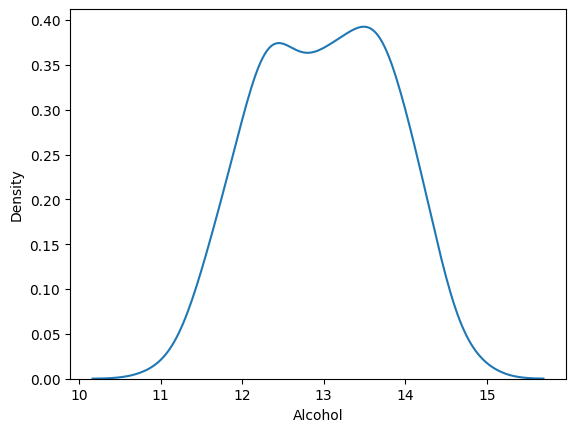

In [7]:
sns.kdeplot(dataset['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

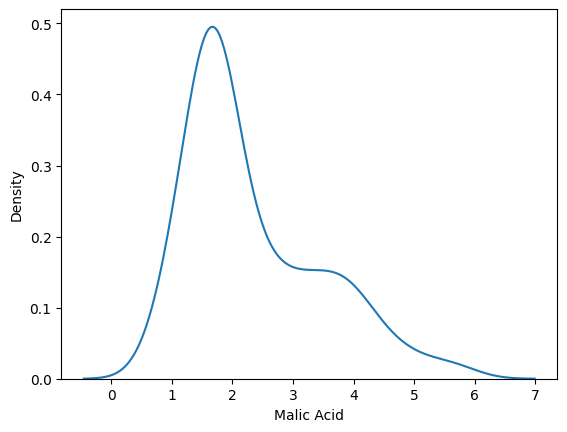

In [9]:
sns.kdeplot(dataset['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

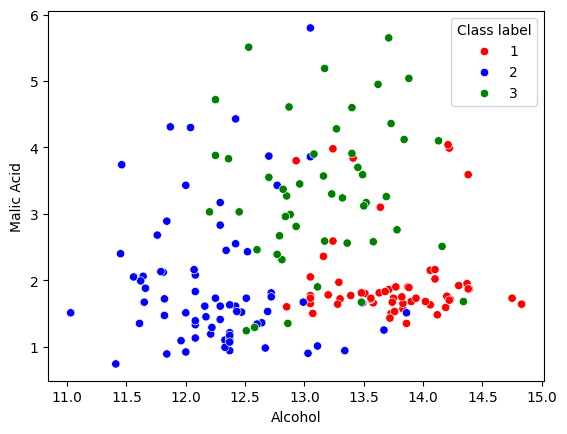

In [11]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x = dataset['Alcohol'], y = dataset['Malic Acid'],hue=dataset['Class label'],palette=color_dict)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('Class label', axis = 1),
                                                    dataset['Class label'],
                                                    test_size = 0.3,
                                                    random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [15]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
Scaler.fit(X_train)

X_train_scaler = Scaler.transform(X_train)
X_test_scaler = Scaler.transform(X_test)

In [17]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)

In [19]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [21]:
np.round(X_train_scaler.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


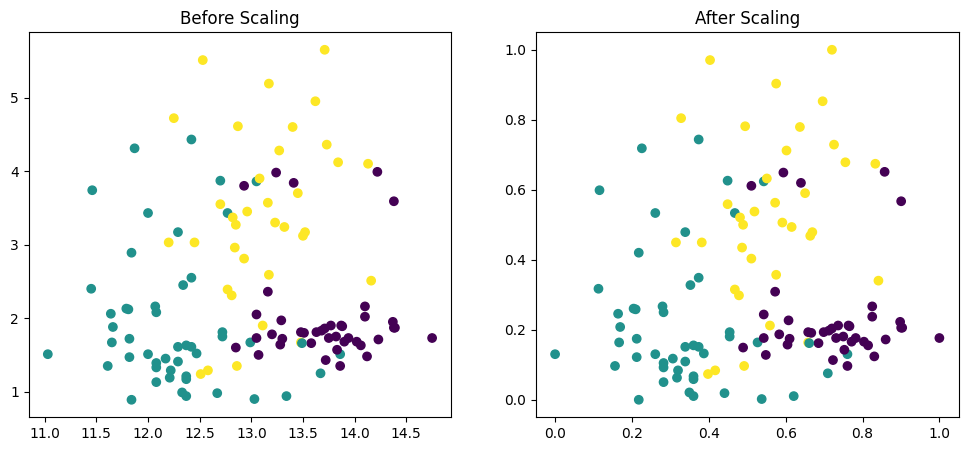

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c = Y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaler['Alcohol'], X_train_scaler['Malic Acid'], c = Y_train)
ax2.set_title('After Scaling')
plt.show()

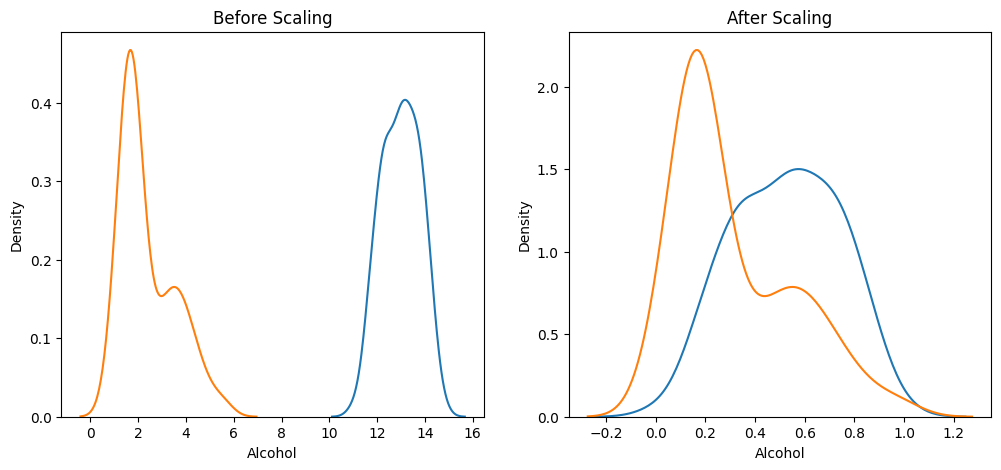

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaler['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaler['Malic Acid'], ax = ax2)
plt.show()